# Transfer Learning CIFAR10

* Train a simple convnet on the CIFAR dataset the first 5 output classes [0..4].
* Freeze convolutional layers and fine-tune dense layers for the last 5 ouput classes [5..9].


### 1. Import CIFAR10 data and create 2 datasets with one dataset having classes from 0 to 4 and other having classes from 5 to 9 

In [0]:
from __future__ import absolute_import, division, print_function
import numpy as np
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (350, 150)

Using TensorFlow backend.


In [0]:
%matplotlib inline
# Load/Prep the Data
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


### 2. Use One-hot encoding to divide y_train and y_test into required no of output classes

In [0]:
Y_train.shape

(50000, 1)

In [0]:
Y_cifar_train = Y_train.reshape(50000,)
Y_cifar_test = Y_test.reshape(10000,)

In [0]:
X_train_lt5 = X_train[Y_cifar_train < 5]
Y_train_lt5 = Y_cifar_train[Y_cifar_train < 5]
X_test_lt5 = X_test[Y_cifar_test < 5]
Y_test_lt5 = Y_cifar_test[Y_cifar_test < 5]

X_train_gte5 = X_train[Y_cifar_train >= 5]
Y_train_gte5 = Y_cifar_train[Y_cifar_train >= 5] - 5
X_test_gte5 = X_test[Y_cifar_test >= 5]
Y_test_gte5 = Y_cifar_test[Y_cifar_test >= 5] - 5

In [0]:
num_classes = np.unique(Y_train_lt5).shape[0]
num_classes

5

In [0]:
Y_train_lt5 = np_utils.to_categorical(Y_train_lt5, num_classes) # One-hot encode the labels
Y_test_lt5 = np_utils.to_categorical(Y_test_lt5, num_classes) # One-hot encode the labels

In [0]:
Y_train_gte5 = np_utils.to_categorical(Y_train_gte5, num_classes) # One-hot encode the labels
Y_test_gte5 = np_utils.to_categorical(Y_test_gte5, num_classes) # One-hot encode the labels

### 3. Build a sequential neural network model which can classify the classes 0 to 4 of CIFAR10 dataset with at least 80% accuracy on test data

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Text(0.5, 0.98, 'Example of training images (from first 5 categories), for the first neural net\n')

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

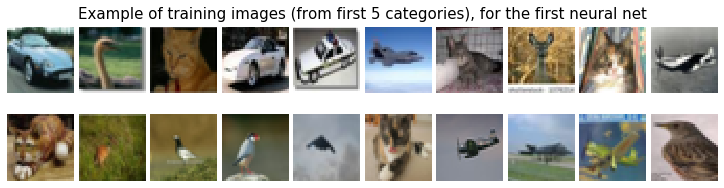

In [0]:
import matplotlib.pyplot as plt
import random
fig, ax = plt.subplots(2,10,figsize=(10,2.8))
fig.suptitle("Example of training images (from first 5 categories), for the first neural net\n", fontsize=15)
axes = ax.ravel()
for i in range(20):
    # Pick a random number
    idx=random.randint(1,1000)
    axes[i].imshow(X_train_lt5[idx])
    axes[i].axis('off')
fig.tight_layout(pad=0.5)
plt.show()

In [0]:
X_train_lt5 = X_train_lt5.astype('float32')
X_test_lt5 = X_test_lt5.astype('float32')

X_train_gte5 = X_train_gte5.astype('float32')
X_test_gte5 = X_test_gte5.astype('float32')

In [0]:
X_train_lt5 /= 255
X_test_lt5 /= 255

X_train_gte5 /= 255
X_test_gte5 /= 255

In [0]:
print('X_train_lt5 shape:', X_train_lt5.shape)
print(X_train_lt5.shape[0], 'train samples')
print(X_test_lt5.shape[0], 'test samples')

X_train_lt5 shape: (25000, 32, 32, 3)
25000 train samples
5000 test samples


In [0]:
print(Y_train_lt5[0])

[0. 0. 0. 0. 1.]


In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

#Initialize the model
model = Sequential()

input_shape=(32,32,3)
#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape,name='conv_1'))

#Add a Convolutional Layer with 16 filters of size 5x5 and activation function as 'ReLU' 
model.add(Conv2D(16, (5, 5), activation='relu',name='conv_2'))

#Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2),name='max_1'))

#Add a Convolutional Layer with 8 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(8, (3, 3), activation='relu',name='conv_3'))

#Flatten the layer
model.add(Flatten())

#Apply Dropout with 0.42 probability 
model.add(Dropout(0.42,name='drop_1'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model.add(Dense(128, activation='relu',name='dense_1'))

#Add Fully Connected Layer with 5 units and activation function as 'softmax'
model.add(Dense(5, activation='softmax',name='dense_2'))

In [0]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 16)        12816     
_________________________________________________________________
max_1 (MaxPooling2D)         (None, 12, 12, 16)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 10, 10, 8)         1160      
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
drop_1 (Dropout)             (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [0]:
#Training on the dataset
model.fit(X_train_lt5, Y_train_lt5,
          batch_size=100,
          epochs=10,
          verbose=2,
          shuffle=True,
          validation_data=(X_test_lt5, Y_test_lt5))

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Train on 25000 samples, validate on 5000 samples
Epoch 1/10
 - 82s - loss: 1.1838 - acc: 0.5204 - val_loss: 0.7954 - val_acc: 0.6822
Epoch 2/10
 - 82s - loss: 0.6492 - acc: 0.7529 - val_loss: 0.6865 - val_acc: 0.7420
Epoch 3/10
 - 81s - loss: 0.5559 - acc: 0.7870 - val_loss: 0.6749 - val_acc: 0.7438
Epoch 4/10
 - 81s - loss: 0.5144 - acc: 0.8027 - val_loss: 0.6787 - val_acc: 0.7498
Epoch 5/10
 - 82s - loss: 0.4830 - acc: 0.8176 - val_loss: 0.6970 - val_acc: 0.7484
Epoch 6/10
 - 82s - loss: 0.4674 - acc: 0.8214 - val_loss: 0.6675 - val_acc: 0.7506
Epoch 7/10
 - 81s - loss: 0.4561 - acc: 0.8286 - val_loss: 0.6750 - val_acc: 0.7522
Epoch 8/10
 - 81s - loss: 0.4411 - acc: 0.8356 - val_loss: 0.6776 - val_acc: 0.7536
Epoch 9/10
 - 82s - loss: 0.4329 - acc: 0.8347 - val_loss: 0.6784 - val_acc: 0.7488
Epoch 10/10
 - 82s - loss: 0.4174 - acc: 0.8409 - val_loss: 0.6843 - val_acc: 0.7540


### 4. In the model which was built above (for classification of classes 0-4 in CIFAR10), make only the dense layers to be trainable and conv layers to be non-trainable

In [0]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in model.layers:
  if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 16)        12816     
_________________________________________________________________
max_1 (MaxPooling2D)         (None, 12, 12, 16)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 10, 10, 8)         1160      
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
drop_1 (Dropout)             (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


### 5. Utilize the the model trained on CIFAR 10 (classes 0 to 4) to classify the classes 5 to 9 of CIFAR 10  (Use Transfer Learning) <br>
Achieve an accuracy of more than 85% on test data

In [0]:
#Training on the dataset
model.fit(X_train_gte5, Y_train_gte5,
          batch_size=100,
          epochs=10,
          verbose=2,
          shuffle=True,
          validation_data=(X_test_gte5, Y_test_gte5))

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Train on 25000 samples, validate on 5000 samples
Epoch 1/10
 - 82s - loss: 0.7704 - acc: 0.7273 - val_loss: 0.5688 - val_acc: 0.7858
Epoch 2/10
 - 82s - loss: 0.4972 - acc: 0.8118 - val_loss: 0.5013 - val_acc: 0.8178
Epoch 3/10
 - 82s - loss: 0.4604 - acc: 0.8273 - val_loss: 0.5169 - val_acc: 0.8100
Epoch 4/10
 - 82s - loss: 0.4413 - acc: 0.8341 - val_loss: 0.4873 - val_acc: 0.8218
Epoch 5/10
 - 82s - loss: 0.4212 - acc: 0.8411 - val_loss: 0.4592 - val_acc: 0.8326
Epoch 6/10
 - 82s - loss: 0.4045 - acc: 0.8462 - val_loss: 0.4444 - val_acc: 0.8394
Epoch 7/10
 - 82s - loss: 0.3988 - acc: 0.8504 - val_loss: 0.4285 - val_acc: 0.8464
Epoch 8/10
 - 82s - loss: 0.3947 - acc: 0.8493 - val_loss: 0.4375 - val_acc: 0.8422
Epoch 9/10
 - 82s - loss: 0.3761 - acc: 0.8614 - val_loss: 0.4451 - val_acc: 0.8400
Epoch 10/10
 - 82s - loss: 0.3646 - acc: 0.8631 - val_loss: 0.4506 - val_acc: 0.8368


# Text classification using TF-IDF

### 6. Load the dataset from sklearn.datasets

In [0]:
from sklearn.datasets import fetch_20newsgroups

In [0]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

### 7. Training data

In [0]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

### 8. Test data

In [0]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

###  a.  You can access the values for the target variable using .target attribute 
###  b. You can access the name of the class in the target variable with .target_names


In [0]:
twenty_train.target

array([1, 1, 3, ..., 2, 2, 2])

In [0]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [0]:
twenty_test.target

array([2, 2, 2, ..., 2, 2, 1])

In [0]:
twenty_test.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [0]:
twenty_train.data[0:5]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

### 9.  Now with dependent and independent data available for both train and test datasets, using TfidfVectorizer fit and transform the training data and test data and get the tfidf features for both

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(twenty_train)

# encode document
train_vectors = vectorizer.transform(twenty_train.data)
test_vectors = vectorizer.transform(twenty_test.data)

# summarize
print(vectorizer.vocabulary_)

print(vectorizer.idf_)

print(train_vectors.shape, test_vectors.shape)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

{'data': 0, 'filenames': 2, 'target_names': 4, 'target': 3, 'descr': 1}
[2.09861229 2.09861229 2.09861229 2.09861229 2.09861229]
(2257, 5) (1502, 5)


### 10. Use logisticRegression with tfidf features as input and targets as output and train the model and report the train and test accuracy score

In [0]:
from sklearn.linear_model import LogisticRegression #importing logistic regression

lr = LogisticRegression()

In [0]:
lr.fit(train_vectors, twenty_train.target)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn import metrics
test_labels = twenty_test.target
test_pred = lr.predict(test_vectors)
print(metrics.confusion_matrix(test_labels, test_pred))


[[  4  13   0 302]
 [  1  41   0 347]
 [  0  26   0 370]
 [  0   2   0 396]]
